# (04) CategoricalVAE

**Motivation**: Test rsample. Does it really work? <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vase/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_PoissonVAE'))
from analysis.eval import sparse_score
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
device_idx = 0
device = f'cuda:{device_idx}'

model_type = 'categorical'
from base.distributions import dists, Categorical

In [3]:
cfg_vae, cfg_tr = default_configs('MNIST', model_type, 'conv+b|conv+b')

print(f"VAE:\n{cfg_vae}\n\nTrainer:\n{cfg_tr}")

VAE:
{'dataset': 'MNIST', 'n_ch': 32, 'n_latents': 10, 'n_categories': 10, 'enc_type': 'conv', 'dec_type': 'conv', 
'enc_bias': True, 'dec_bias': True}

Trainer:
{'temp_anneal_portion': 0.5, 'temp_anneal_type': 'lin', 'temp_start': 1.0, 'temp_stop': 0.1, 'lr': 0.002, 'epochs':
1000, 'batch_size': 200, 'warm_restart': 2, 'optimizer_kws': {'weight_decay': 0.0003}, 'grad_clip': 1000}

+----------------+------------+
|  Module Name   | Num Params |
+----------------+------------+
| CategoricalVAE |  6.3 Mil   |
|      ---       |    ---     |
|      stem      |    352     |
|      enc       |  4.9 Mil   |
|     fc_enc     |   25.7 K   |
|     fc_dec     |  103.4 K   |
|      dec       |  1.2 Mil   |
+----------------+------------+

categorical_c-10_MNIST_z-10_k-32_<conv+b|conv+b>
mc_b200-ep1000-lr(0.002)_beta(1:0x0.5)_temp(0.1:lin-0.5)_gr(1000)_(2024_05_05,15:13)

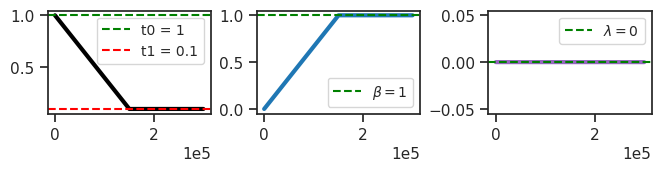

In [4]:
vae = MODEL_CLASSES[model_type](CFG_CLASSES[model_type](**cfg_vae))
tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

vae.print()
print(f"{vae.cfg.name()}\n{tr.cfg.name()}_({vae.timestamp})\n")
tr.show_schedules()

In [5]:
vae.cfg.name()

'categorical_c-10_MNIST_z-10_k-32_<conv+b|conv+b>'

In [6]:
vae.cfg.runs_dir

'/home/hadi/Projects/PoissonVAE/runs/categorical_c-10_MNIST_z-10_k-32_<conv+b|conv+b>'

In [7]:
torch.sigmoid(vae.logits)

tensor([[[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000],
         [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000],
         [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000],
         [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000],
         [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000],
         [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000],
         [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000],
         [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000],
         [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000],
         [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000,

In [8]:
torch.sigmoid(vae.logits).sum(-1)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], device='cuda:0')

In [9]:
x, *_ = next(iter(tr.dl_vld))
x.shape

torch.Size([200, 1, 28, 28])

In [10]:
# with torch.inference_mode():
dist, z, y = vae(x)

<Axes: ylabel='Count'>

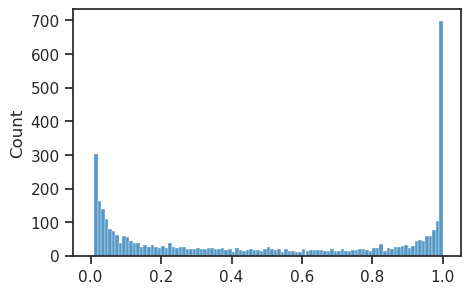

In [11]:
x2p = tonp(dist.probs.ravel())
sns.histplot(x2p[x2p > 0.01], bins=np.linspace(0, 1, 101))

In [12]:
loss = torch.sum((dist.rsample() - 1).pow(2))
loss.backward()

In [13]:
vae.stem.bias.grad

tensor([-29.6515, -46.2480,   5.2437,  21.2658, 113.2567, -13.7855,  19.9296,
         -4.7984,  22.5497,  46.7027,  15.3849,   6.8394, -26.7323, 162.3295,
        -58.8134,  13.6335,  58.8092,  30.2605, -12.6746, -15.3472, -38.8823,
         41.3092,  -0.3783, -48.2880,  20.0336, -40.6113,  -3.5663, 119.4552,
        -33.1864, -52.2635, -40.2610,  60.0013], device='cuda:0')

In [26]:
vae.probs.sum(-1)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], device='cuda:0')

In [9]:
probs = torch.tensor([[0, 0, 0, 1, 0]], dtype=torch.float32)
c = Categorical(probs=probs, temp=0.8)

In [10]:
c.probs

tensor([[0., 0., 0., 1., 0.]])

In [11]:
from torch.distributions.utils import broadcast_all, clamp_probs

In [12]:
dists.utils.clamp_probs(probs)

tensor([[1.1921e-07, 1.1921e-07, 1.1921e-07, 1.0000e+00, 1.1921e-07]])

In [5]:
torch.round(c.logits, decimals=3)

tensor([[-15.9420, -15.9420, -15.9420,  -0.0000, -15.9420]])

In [6]:
eps = torch.finfo(torch.float).eps
logits_eps = torch.logit(torch.clamp(c.probs, eps, 1-eps))

torch.round(logits_eps, decimals=3)

tensor([[-15.9420, -15.9420, -15.9420,  15.9420, -15.9420]])

In [7]:
torch.sigmoid(logits_eps)

tensor([[1.1921e-07, 1.1921e-07, 1.1921e-07, 1.0000e+00, 1.1921e-07]])

In [8]:
logits = torch.randn(123, 20, 10) * 0.1
# c = dists.RelaxedOneHotCategorical(temperature=1e-9, logits=logits)
c = Categorical(logits=logits, temp=0.8)
c.t

0.8

<Axes: ylabel='Count'>

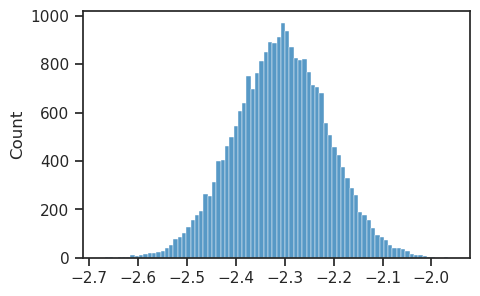

In [9]:
sns.histplot(tonp(c.logits.ravel()))

<Axes: ylabel='Count'>

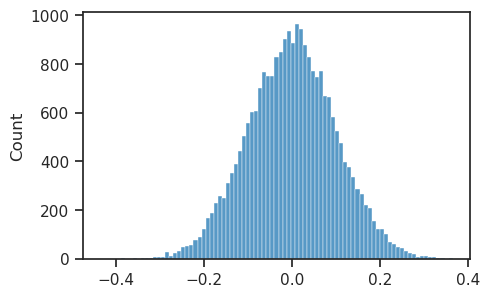

In [10]:
sns.histplot(tonp(logits.ravel()))

In [11]:
c.probs[0, 1]

tensor([0.0864, 0.0930, 0.1122, 0.1057, 0.1070, 0.1274, 0.1006, 0.0899, 0.0853,
        0.0925])

In [12]:
torch.logit(c.probs)[0, 1]

tensor([-2.3588, -2.2770, -2.0686, -2.1349, -2.1215, -1.9243, -2.1905, -2.3151,
        -2.3730, -2.2834])

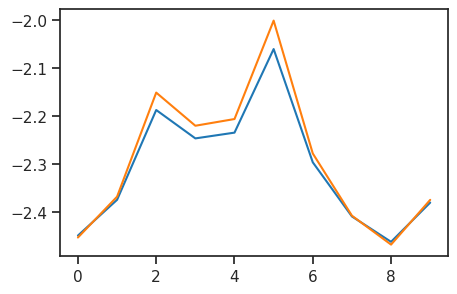

In [13]:
plt.plot(tonp(c.logits[0, 1]));
plt.plot(tonp(torch.logit(c.probs[0, 1])) * 1.04);

In [17]:
logits = torch.randn(123, 20, 10) * 0.1
c = Categorical(logits=logits, temp=0.8)

probs = torch.sigmoid(logits)

eps = torch.finfo(torch.float).eps
probs_eps = torch.clamp(probs, eps, 1-eps)

logits_eps = torch.logit(probs_eps)

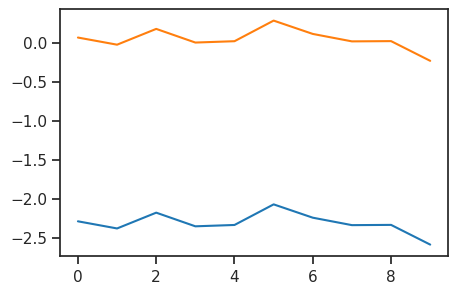

In [21]:
plt.plot(tonp(c.logits[0, 1]));
plt.plot(tonp(logits_eps[0, 1]));

In [24]:
c.logits - (logits - logits.logsumexp(dim=-1, keepdim=True))

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [7]:
samples = c.rsample()
samples.shape

torch.Size([123, 20, 10])

<StemContainer object of 3 artists>

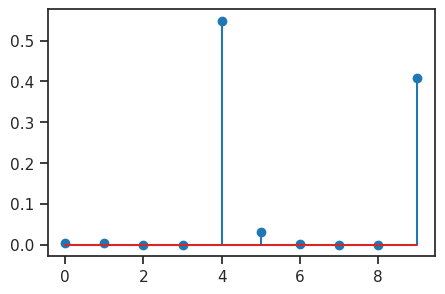

In [8]:
plt.stem(samples[3, 0])

In [9]:
torch.argmax(c.logits[3, 0])

tensor(9)

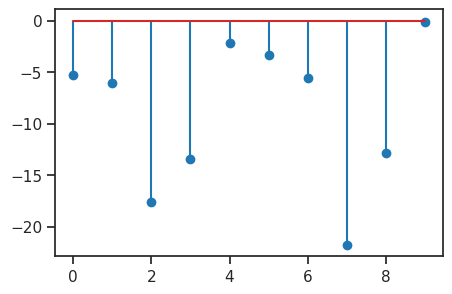

In [10]:
plt.stem(c.logits[3, 0]);

In [11]:
np.round(tonp(c.probs[3, 0]).astype(float), 3)

array([0.005, 0.002, 0.   , 0.   , 0.113, 0.035, 0.004, 0.   , 0.   ,
       0.841])

In [12]:
collections.Counter(np.round(tonp(samples.ravel()), 7))

Counter({0.0: 5877,
         1e-07: 1008,
         2e-07: 510,
         3e-07: 308,
         4e-07: 284,
         5e-07: 232,
         6e-07: 183,
         7e-07: 138,
         9e-07: 124,
         8e-07: 120,
         1e-06: 108,
         1.1e-06: 101,
         1.4e-06: 97,
         1.2e-06: 93,
         1.5e-06: 71,
         1.6e-06: 68,
         1.3e-06: 66,
         1.7e-06: 64,
         1.9e-06: 62,
         2.1e-06: 59,
         1.8e-06: 59,
         2e-06: 56,
         2.3e-06: 55,
         2.5e-06: 55,
         2.2e-06: 54,
         2.7e-06: 49,
         4e-06: 47,
         3.1e-06: 47,
         2.9e-06: 44,
         3e-06: 43,
         3.3e-06: 41,
         2.8e-06: 40,
         4.1e-06: 40,
         3.2e-06: 40,
         2.6e-06: 39,
         2.4e-06: 35,
         3.8e-06: 33,
         3.6e-06: 32,
         4.2e-06: 31,
         4.3e-06: 29,
         4.6e-06: 28,
         3.4e-06: 28,
         5e-06: 28,
         4.9e-06: 27,
         3.9e-06: 27,
         7.6e-06: 27,
      

In [13]:
123 * 20

2460

In [14]:
kl1 = c.kl()

In [15]:
n_categories = 10
size = (1, 20, n_categories)
probs = nn.Parameter(
    data=torch.full(size, 1 / n_categories), # torch.ones(size) / 10,
    requires_grad=False,
)
p = dists.Categorical(probs.expand(123, -1, -1))
q = dists.Categorical(c.probs)

In [16]:
kl2 = dists.kl.kl_divergence(q, p)

In [17]:
kl1 - kl2

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [18]:
samples.shape

torch.Size([123, 20, 10])

In [71]:
n_categories = 10
size = (1, 20, n_categories)
probs = nn.Parameter(
    data=torch.full(size, 1 / n_categories), # torch.ones(size) / 10,
    requires_grad=False,
)

In [81]:
p = dists.Categorical(probs.expand(123, -1, -1))
q = dists.Categorical(c.probs)

In [82]:
kl = dists.kl.kl_divergence(q, p)
kl.shape

torch.Size([123, 20])

In [83]:
q.probs.shape

torch.Size([123, 20, 10])

In [93]:
(-1, *c.event_shape)

(-1, 10)

In [102]:
torch.full(c.probs.size(),  1/10).shape

torch.Size([123, 20, 10])

In [104]:
1 / c.event_shape

TypeError: unsupported operand type(s) for /: 'int' and 'builtin_function_or_method'

In [112]:
c.param_shape

AttributeError: 'RelaxedOneHotCategorical' object has no attribute 'param_shape'

In [113]:
q.param_shape

torch.Size([123, 20, 10])

In [115]:
c.probs.size(-1)

10

In [30]:
np.prod((1, 3, 4))

12

In [31]:
samples.shape

torch.Size([123, 20, 10])

In [34]:
samples.flatten(start_dim=1).shape

torch.Size([123, 200])

In [ ]:
torch.flatten()

In [28]:
s = (
    20,
	10,
)
s

(20, 10)

In [40]:
np.prod(s)

200

In [21]:
c.sample()

tensor([[[2.0343e-08, 1.6731e-02, 9.3222e-04,  ..., 5.1121e-07,
          3.5668e-06, 9.7658e-01],
         [8.7147e-03, 1.9185e-09, 4.4628e-01,  ..., 4.0765e-03,
          2.6350e-04, 1.4894e-03],
         [2.2575e-12, 1.0000e+00, 4.0989e-11,  ..., 5.4019e-12,
          2.5910e-18, 2.8957e-09],
         ...,
         [2.6499e-06, 4.6758e-10, 9.7590e-09,  ..., 6.7215e-10,
          1.7269e-11, 7.7847e-12],
         [4.6269e-01, 1.0878e-05, 1.7513e-05,  ..., 1.8178e-03,
          2.5622e-07, 5.3485e-01],
         [6.8516e-03, 7.5416e-07, 3.4506e-04,  ..., 2.0248e-05,
          8.8802e-04, 2.1402e-04]],

        [[8.2235e-05, 7.7732e-06, 1.8785e-05,  ..., 9.9985e-01,
          2.3180e-05, 1.8540e-05],
         [7.7721e-06, 2.4302e-08, 4.8627e-04,  ..., 7.5737e-05,
          2.3589e-05, 9.7820e-01],
         [2.3479e-06, 2.9716e-09, 1.8253e-02,  ..., 1.9738e-01,
          2.0779e-06, 8.0593e-09],
         ...,
         [4.0129e-08, 2.6942e-03, 8.4930e-07,  ..., 4.5331e-06,
          8.362

In [22]:
c.rsample()

tensor([[[3.5777e-08, 4.8138e-03, 5.7727e-04,  ..., 2.7965e-07,
          9.6432e-06, 9.9358e-01],
         [8.6567e-04, 5.7138e-11, 5.8050e-02,  ..., 2.3321e-04,
          1.4182e-05, 1.6902e-03],
         [1.4158e-10, 1.0000e+00, 2.9084e-09,  ..., 5.2576e-10,
          4.0218e-17, 1.2068e-07],
         ...,
         [7.0375e-06, 6.7239e-10, 3.3706e-09,  ..., 6.0250e-09,
          4.2770e-11, 1.2207e-11],
         [9.8590e-01, 3.6454e-05, 4.1891e-05,  ..., 7.7844e-03,
          9.3244e-09, 5.6628e-03],
         [3.1902e-01, 4.4852e-06, 1.6881e-03,  ..., 2.2527e-05,
          1.4267e-03, 1.8543e-02]],

        [[2.0085e-02, 9.8565e-04, 1.0404e-03,  ..., 9.7720e-01,
          7.1245e-05, 6.1249e-04],
         [4.2363e-05, 1.6385e-08, 1.0887e-03,  ..., 2.5213e-04,
          7.9673e-06, 9.6497e-01],
         [7.3741e-06, 2.8955e-07, 6.7648e-03,  ..., 9.9028e-01,
          6.2019e-06, 8.4911e-08],
         ...,
         [8.2201e-08, 3.6230e-04, 1.5276e-07,  ..., 6.0347e-06,
          8.489

In [31]:
x = torch.randn(125, 200)
x.shape, x.view(-1, *s).shape

(torch.Size([125, 200]), torch.Size([125, 20, 10]))

In [46]:
samples = gumbel_softmax(c.logits, 0.01)
samples.shape

torch.Size([123, 10])

<StemContainer object of 3 artists>

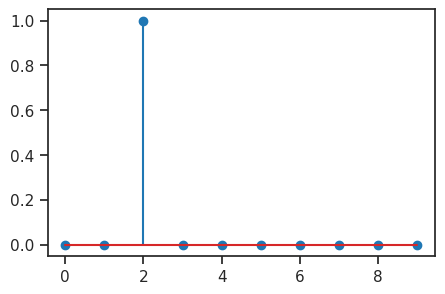

In [47]:
plt.stem(samples[2])

In [48]:
samples[2]

tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [38]:
def gumbel_distribution_sample(shape: torch.Size, eps=1e-20) -> torch.Tensor:
    """Samples from the Gumbel distribution given a tensor shape and value of epsilon.
    
    note: the \eps here is just for numerical stability. The code is basically just doing
            > -log(-log(rand(shape)))
    where rand generates random numbers on U(0, 1). 
    """
    U = torch.rand(shape)
    return -torch.log(-torch.log(U + eps) + eps)

def gumbel_softmax_distribution_sample(logits: torch.Tensor, temperature: float) -> torch.Tensor:
    """Adds Gumbel noise to `logits` and applies softmax along the last dimension.
    
    Softmax is applied wrt a given temperature value. A higher temperature will make the softmax
    softer (less spiky). Lower temperature will make softmax more spiky and less soft. As
    temperature -> 0, this distribution approaches a categorical distribution.
    """
    assert len(logits.shape) == 2 # (should be of shape (b, n_classes))
    y = logits + gumbel_distribution_sample(logits.shape)
    return torch.nn.functional.softmax(y / temperature, dim=-1)

def gumbel_softmax(logits: torch.Tensor, temperature: float, batch=False) -> torch.Tensor:
    """
    Gumbel-softmax.
    input: [*, n_classes] (or [b, *, n_classes] for batch)
    return: flatten --> [*, n_class] a one-hot vector (or b, *, n_classes for batch)
    """
    input_shape = logits.shape
    if batch:
        assert len(logits.shape) == 3
        b, n, k = input_shape
        logits = logits.view(b*n, k)
    assert len(logits.shape) == 2
    y = gumbel_softmax_distribution_sample(logits, temperature)    
    n_classes = input_shape[-1]
    return y.view(input_shape)

In [4]:
logits = torch.randn(123, 10, 14)
samples = gumbel_softmax(logits, temperature=0.1, batch=True)
samples.shape

torch.Size([123, 10, 14])

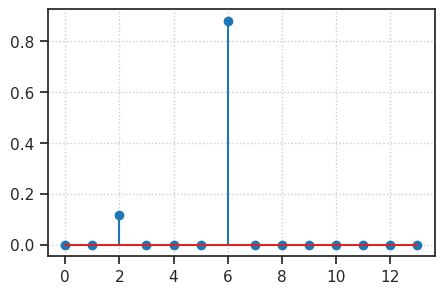

In [5]:
plt.stem(tonp(samples[0, 8]))
plt.grid()

In [6]:
cfg_vae, cfg_tr = default_configs('MNIST', model_type, 'conv+b|conv+b')
print(f"VAE:\n{cfg_vae}\n\nTrainer:\n{cfg_tr}")

VAE:
{'dataset': 'MNIST', 'n_ch': 32, 'n_latents': 10, 'n_categories': 10, 'enc_type': 'conv', 'dec_type': 'conv', 
'enc_bias': True, 'dec_bias': True}

Trainer:
{'temp_anneal_portion': 0.5, 'temp_anneal_type': 'lin', 'temp_start': 1.0, 'temp_stop': 0.1, 'lr': 0.002, 'epochs':
1200, 'batch_size': 200, 'warm_restart': 2, 'optimizer_kws': {'weight_decay': 0.0003}, 'grad_clip': 1000}

In [7]:
vae = MODEL_CLASSES[model_type](CFG_CLASSES[model_type](**cfg_vae))
print(vae.cfg.name())

categorical_c-10_MNIST_z-10_k-32_<conv+b|conv+b>

In [10]:
vae.fc_dec

Linear(in_features=10, out_features=1024, bias=True)

In [2]:
from base.distributions import dists

In [3]:
class MyClass:
    def __init__(self):
        self.Dist = dists.Distribution()  # Initialization here

    def some_method(self):
        # Now you can use self.Dist
        pass

# Create an instance of MyClass
obj = MyClass()

# Access self.Dist
print(obj.Dist)

/home/hadi/anaconda3/lib/python3.11/site-packages/torch/distributions/distribution.py:53: UserWarning: <class 'torch.distributions.distribution.Distribution'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(


NotImplementedError: 

In [9]:
a = obj.Dist

In [7]:
a?

Type:      Distribution
File:      ~/anaconda3/lib/python3.11/site-packages/torch/distributions/distribution.py
Docstring: Distribution is the abstract base class for probability distributions.

TypeError: 'Distribution' object is not callable